Mounting Drive

Importing Data

In [11]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Load dataset
data = pd.read_csv('dataset_sdn.csv')
data = data.dropna()

# Print size and features of dataset
print("Shape of dataset:", data.shape)
print("Columns: ", data.columns)
data

Shape of dataset: (103839, 23)
Columns:  Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [15]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split

# Split data for testing and training

X = data[['pktcount', 'bytecount','pktperflow', 'byteperflow']]

y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train, X_test, y_train, y_test)

        pktperflow  byteperflow
62225         8944      9319648
63968            0            0
38322        15854       856116
10758         9338      9730196
80211         9092       490968
...            ...          ...
55392        10239     10669038
77326        13262     14750916
104200          29         2842
860          13651     14551966
15795         2900      3091400

[83071 rows x 2 columns]         pktperflow  byteperflow
77957        16628       897912
47996         8394      8719172
91952           30         2940
62088           30         2940
36671         6461       374738
...            ...          ...
85288         9840       649440
46926         9229      9616618
104118          29         2842
49230            0            0
93183           29         2842

[20768 rows x 2 columns] 62225     1
63968     0
38322     1
10758     1
80211     0
         ..
55392     1
77326     0
104200    0
860       0
15795     1
Name: label, Length: 83071, dtype: int64 77957  

In [21]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset and split it into training and testing sets

# Assuming you have already loaded and split the data into X_train, X_test, y_train, and y_test

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict y-values for the test data
y_pred = clf.predict(X_test)

# Create a DataFrame with 'pktperflow' and 'predicted_label'
results_df = pd.DataFrame({'pktperflow': X_test['pktperflow'], 'predicted_label': y_pred})

# Print the DataFrame with pktperflow and corresponding predicted labels
print(results_df)


        pktperflow  predicted_label
77957        16628                1
47996         8394                1
91952           30                0
62088           30                0
36671         6461                1
...            ...              ...
85288         9840                0
46926         9229                1
104118          29                0
49230            0                1
93183           29                0

[20768 rows x 2 columns]


Accuracy Score: 0.9998555469953775
Confusion Matrix:
 [[12611     2]
 [    1  8154]]


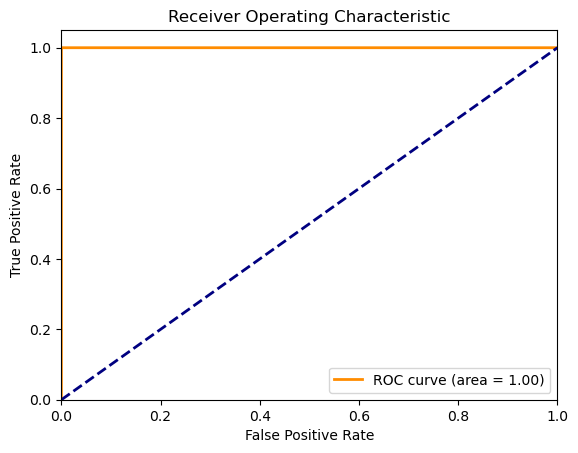

F1-Score: 0.9998160750413831
Recall: 0.999877375843041
Precision: 0.9997547817557626


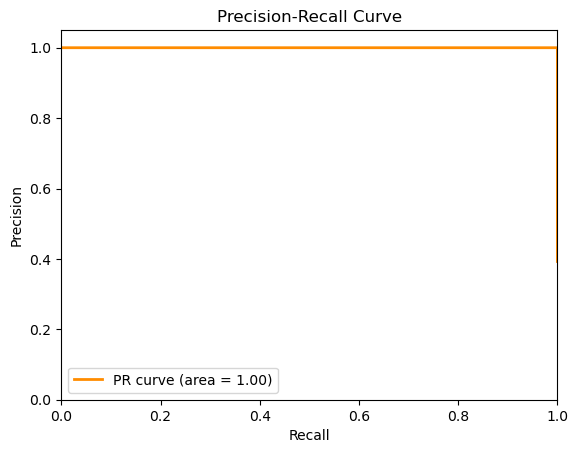

['model.pkl']

In [19]:
from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score, f1_score,
    recall_score, precision_score, precision_recall_curve, accuracy_score,
    classification_report, auc
)
import matplotlib.pyplot as plt


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("F1-Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


joblib.dump(clf, 'model.pkl')